In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
session = 'ALTAI_20240814_SESSION_00'
path = '/Volumes/data2/eTheremin/ALTAI/'+ session + '/'
from format_data import *
from utils import *

In [32]:
#je veux comparer les deux techniques pour extraire les psth

In [44]:
import numpy as np

def compute_psth(spike_times, stimulus_times, bin_size, window, sr):
    """
    Calculate independent PSTHs for each stimulus time.

    Parameters:
    - spike_times: Array of spike times in seconds.
    - stimulus_times: Array of stimulus times in seconds.
    - bin_size: Size of the bins for the histogram.
    - window: Time window around the stimulus to consider (tuple of (start, end)).
    - sr: Sampling rate for converting times if needed.

    Returns:
    - psth_list: List of PSTHs for each stimulus.
    - bin_edges: The edges of the bins used.
    """
    # Convert stimulus and spike times to seconds if not already
    if np.issubdtype(type(stimulus_times), np.number):
        stimulus_times = stimulus_times / sr  # if stimulus_times is an array of numbers
    else:
        stimulus_times = np.array([x / sr for x in stimulus_times])  # if stimulus_times is a list

    spike_times = spike_times / sr  # Convert spike times to seconds
    psth_list = []
    
    # For each stimulus, compute the PSTH independently
    for stim_time in stimulus_times:
        # Get spikes relative to the current stimulus time
        relative_spikes = spike_times - stim_time
        # Select spikes that fall within the specified window
        selected_spikes = relative_spikes[(relative_spikes >= window[0]) & (relative_spikes <= window[1])]
        
        # Create histogram for selected spikes
        bins = np.arange(window[0], window[1] + bin_size, bin_size)
        hist, bin_edges = np.histogram(selected_spikes, bins=bins)
        
        # Store the histogram as a PSTH
        psth_list.append(hist)
    
    return psth_list, bin_edges


In [65]:
# méthode nouvelle avec passage sur chaque trigger 




# Chemin du fichier .pkl
tt_path = path + 'headstage_0/tt.pkl'

# Ouvrir et charger le fichier .pkl
with open(tt_path, 'rb') as file:  # 'rb' signifie read-binary (lecture en binaire)
    tt = pickle.load(file)

spk_times = np.load(path + 'headstage_0/spike_times.npy')
spk_clusters = np.load(path + 'headstage_0/spike_clusters.npy')



an_times = np.array(tt['triggers'])
tones = np.array(tt['tones'])
conditions = np.array(tt['condition'])
sr = 30000
#PLOT
t_pre = 0.3#
t_post = 0.50#0.300
bin_width = 0.02
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
window = [-t_pre, t_post]


clusters = {}
for value, cluster in zip(spk_times, spk_clusters):
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(value)
for cluster, values in clusters.items():
    print(f"Cluster {cluster}: {len(values)}")


tracking, playback = [], []

tracking_stim_times = an_times #an_times[conditions == 0]
playback_stim_times = an_times[conditions == 1]
    #
for cluster in range(32):
    spike_times = np.array(clusters[cluster])
    tr_psth,tr_edges = compute_psth(spike_times, tracking_stim_times, bin_width, window, sr)
    tracking.append(tr_psth)

    pb_psth,pb_edges = compute_psth(spike_times, playback_stim_times, bin_width, window, sr)
    playback.append(pb_psth)

Cluster 2: 91760
Cluster 4: 48162
Cluster 22: 33724
Cluster 3: 152854
Cluster 25: 211873
Cluster 1: 126354
Cluster 20: 172073
Cluster 15: 146998
Cluster 14: 287652
Cluster 26: 104888
Cluster 6: 96121
Cluster 7: 226662
Cluster 23: 107872
Cluster 27: 36827
Cluster 8: 176104
Cluster 18: 16098
Cluster 31: 53727
Cluster 16: 78327
Cluster 0: 114531
Cluster 21: 135624
Cluster 24: 38413
Cluster 11: 13544
Cluster 5: 81351
Cluster 28: 110676
Cluster 13: 41371
Cluster 9: 42906
Cluster 29: 40785
Cluster 10: 23049
Cluster 17: 27543
Cluster 30: 30808
Cluster 12: 10152
Cluster 19: 11524


In [48]:
print(len(tracking[0]))
print(len(playback[0]))

6324
6325


In [67]:
# ancienne méthode : 
data = np.load(path+'headstage_0/data_0.02.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.02.npy', allow_pickle=True)
gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)

tracking_old = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
playback_old = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')

In [56]:
print(len(playback[0]), len(playback_old[0]))
print(len(tracking[0]), len(tracking_old[0]))

6325 6319
6324 6318


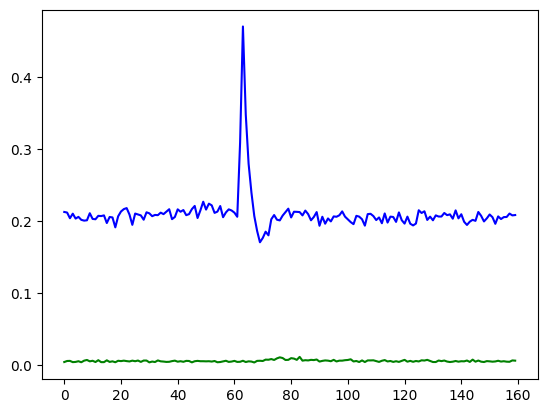

In [57]:
plt.plot(np.nanmean(playback[8], axis=0), c = 'blue')
plt.plot(np.nanmean(playback_old[8], axis=0), c = 'green')

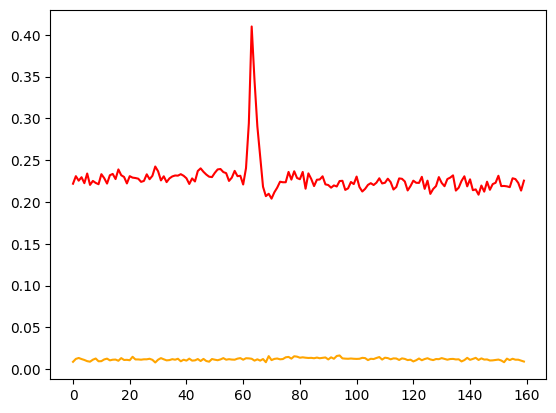

In [58]:
plt.plot(np.nanmean(tracking[8], axis=0), c = 'red')
plt.plot(np.nanmean(tracking_old[8], axis=0), c = 'orange')

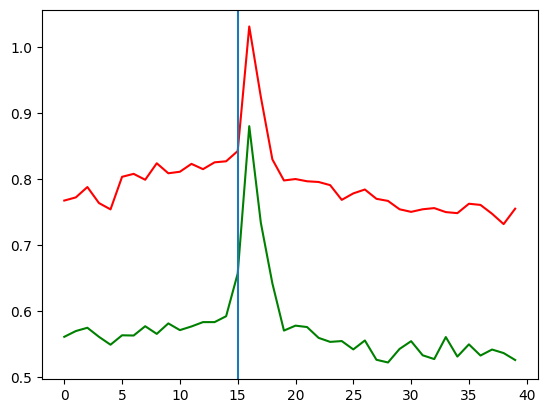

In [70]:
plt.plot(np.nanmean(tracking_old[15], axis=0), c = 'red')
plt.plot(np.nanmean(playback_old[15], axis=0), c = 'green')
plt.axvline(t_pre/bin_width)

In [78]:
elt = tracking_old[15][16]
print(len(elt))

40


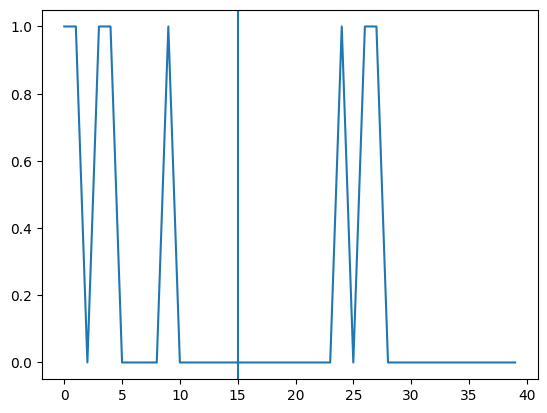

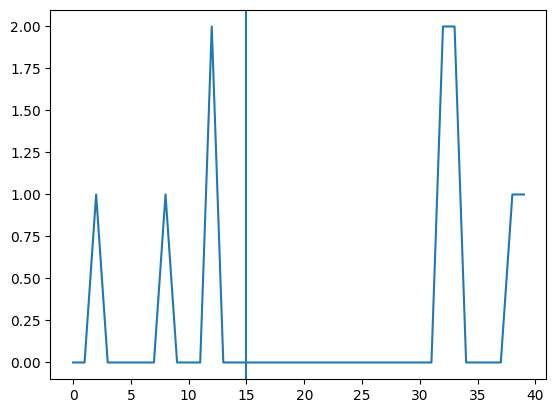

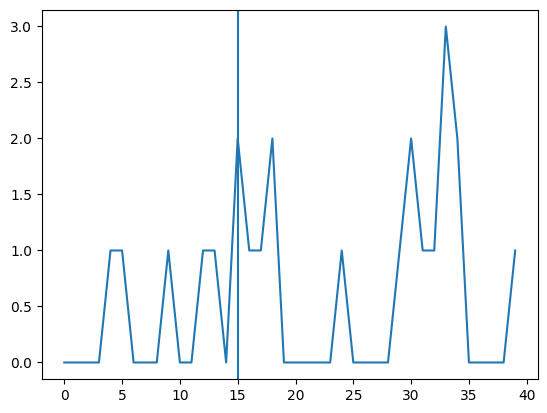

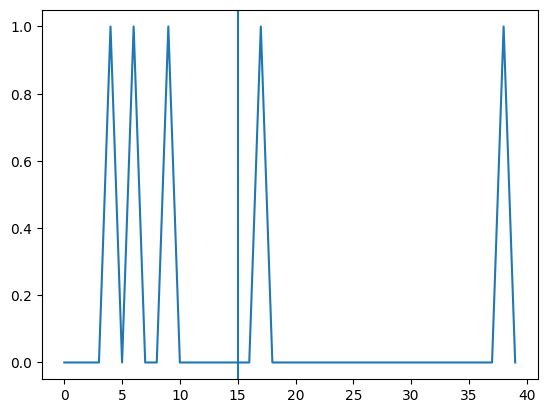

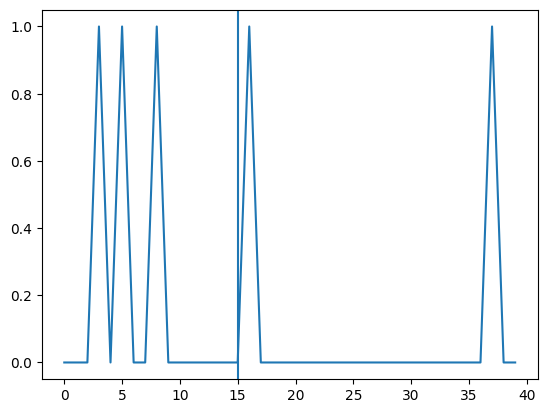

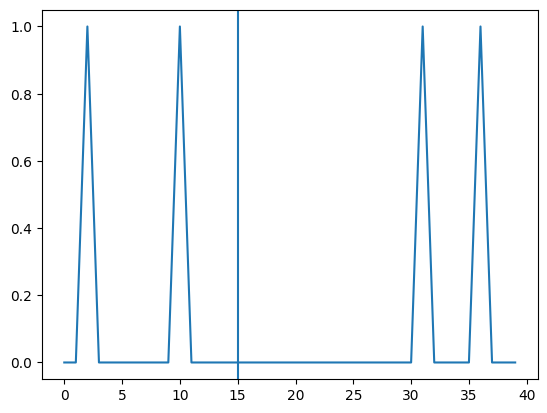

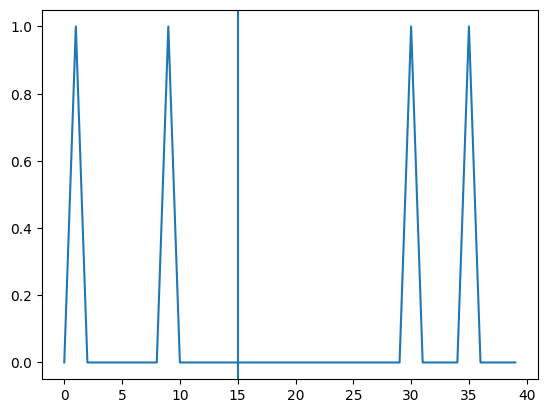

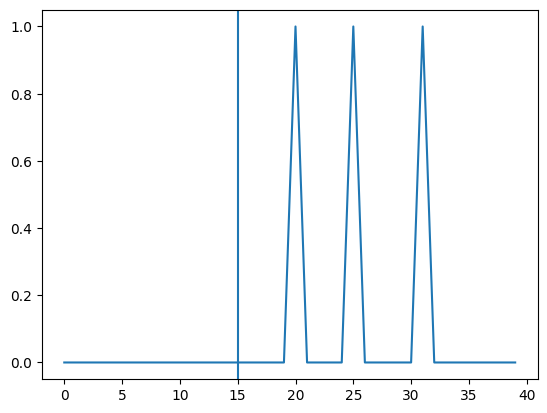

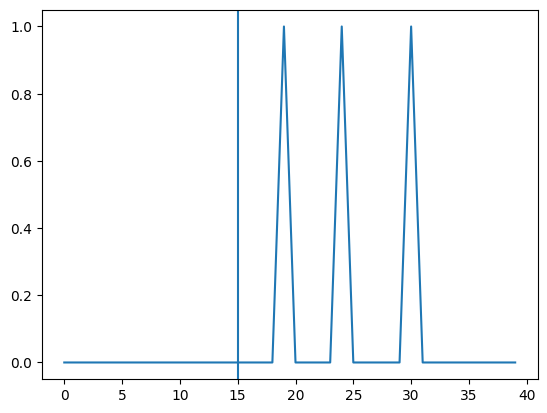

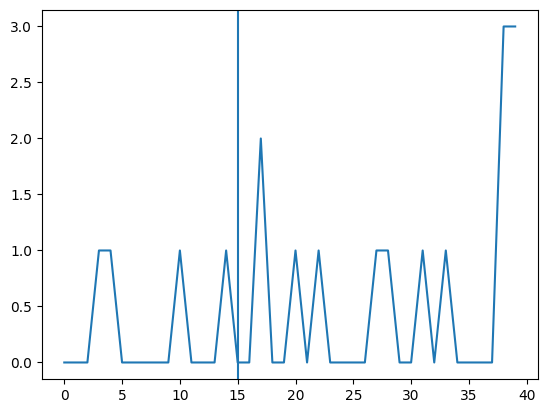

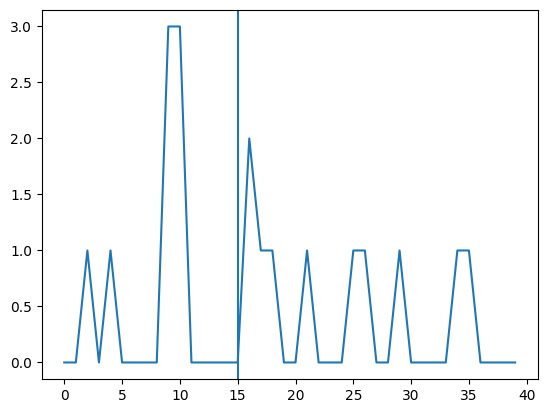

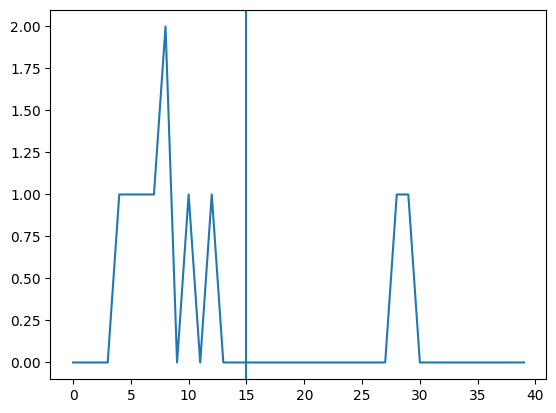

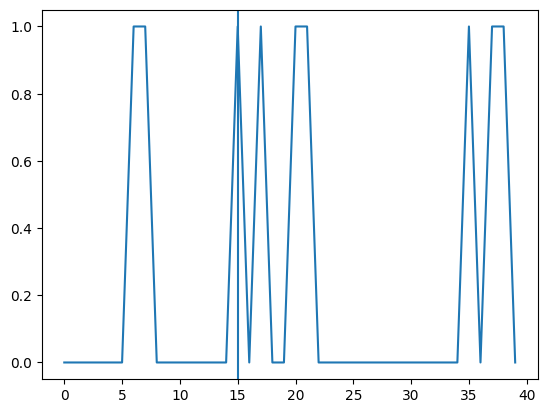

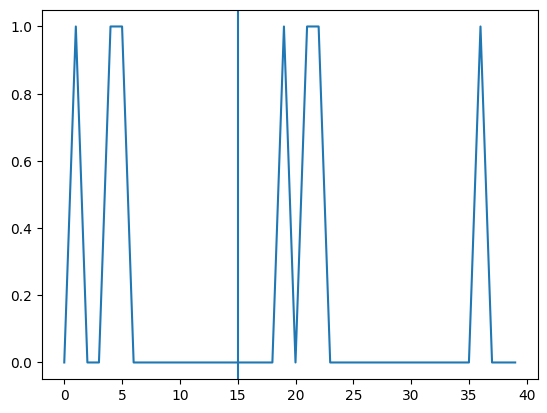

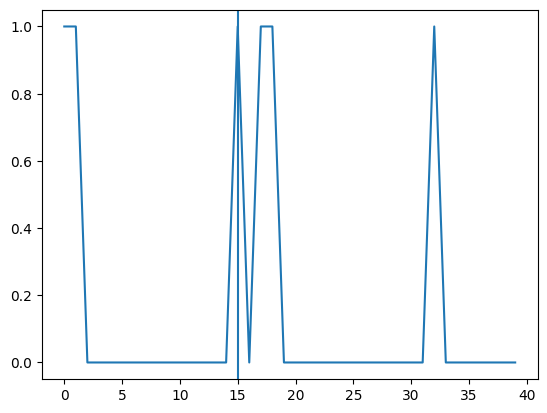

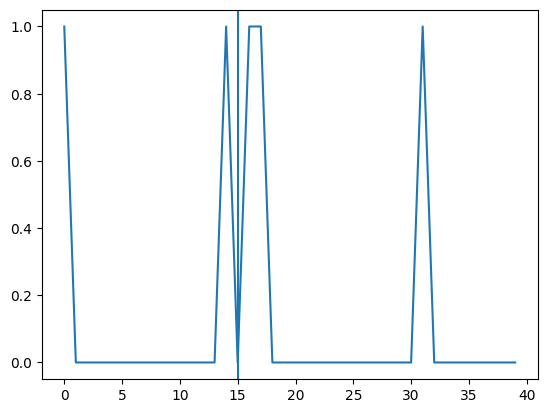

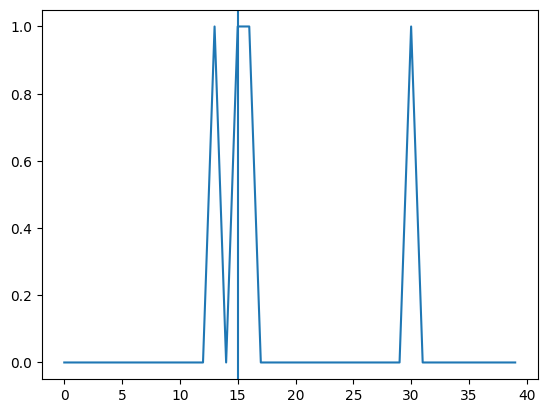

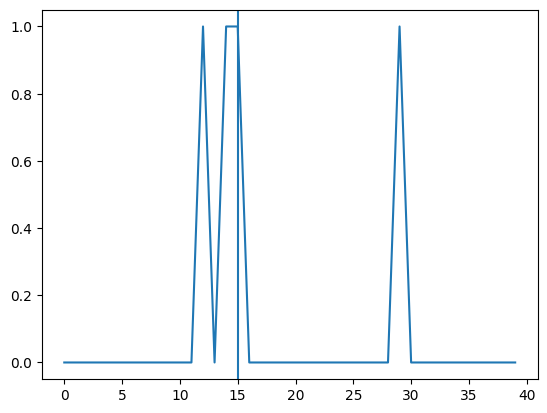

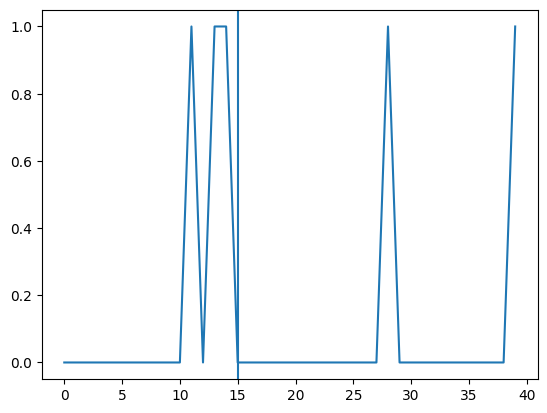

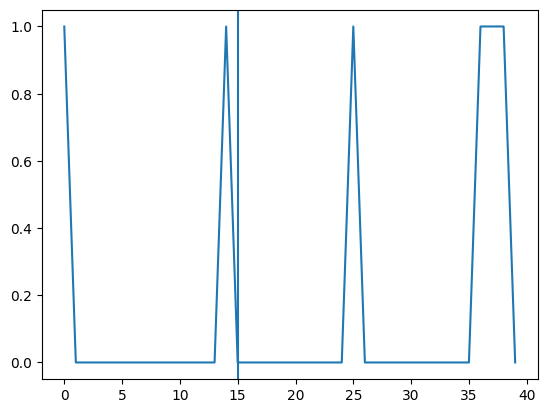

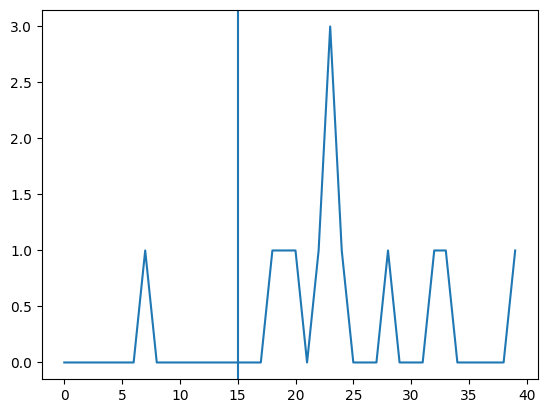

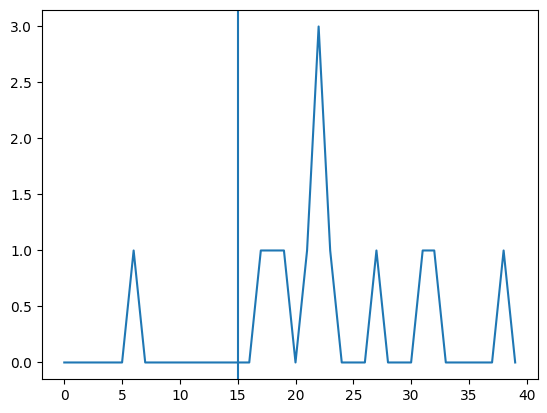

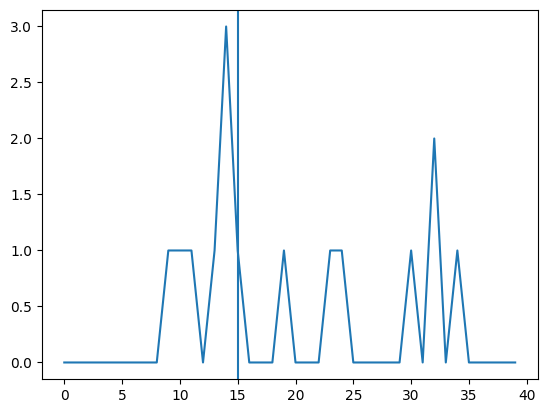

In [81]:
for elt in tracking_old[15][234:257]:
    plt.plot(elt)
    plt.axvline(t_pre/bin_width)
    plt.show()

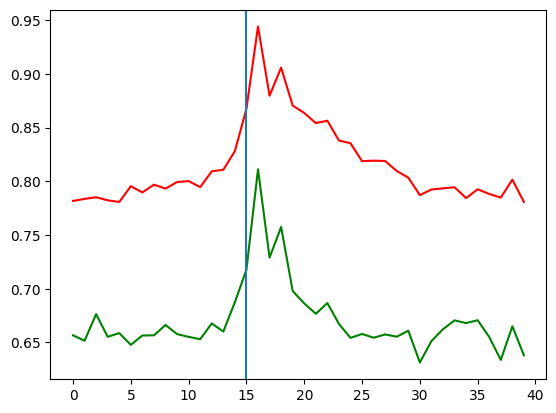

In [69]:
plt.plot(np.nanmean(tracking[15], axis=0), c = 'red')
plt.plot(np.nanmean(playback[15], axis=0), c = 'green')
plt.axvline(t_pre/bin_width)

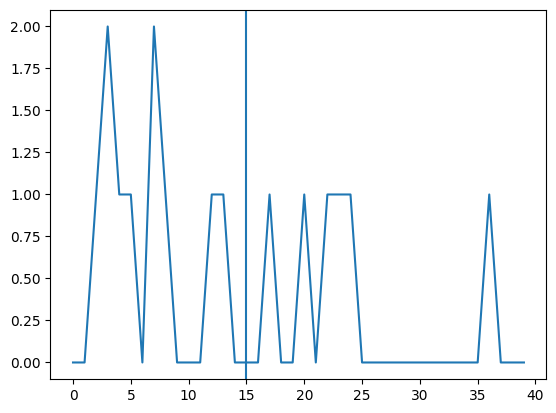

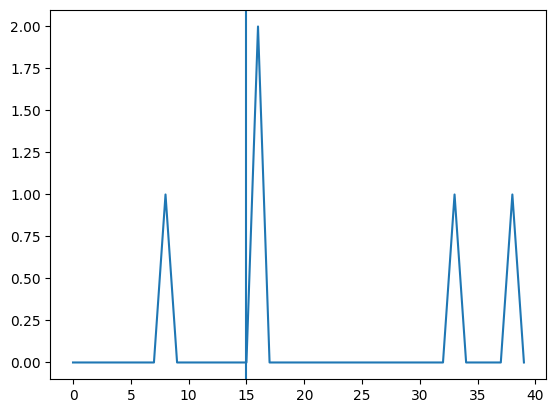

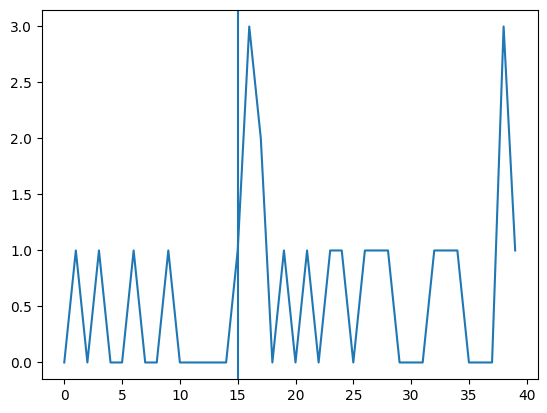

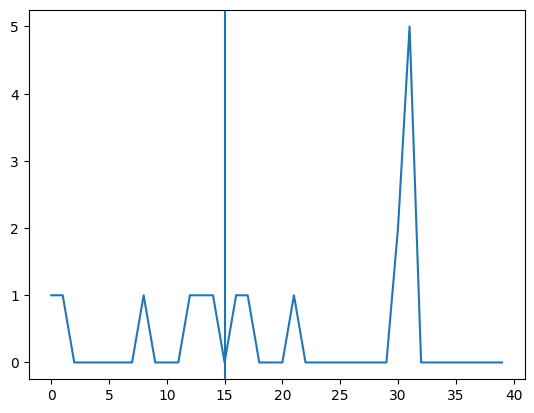

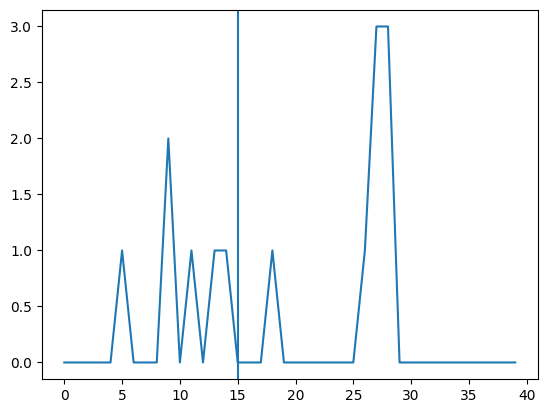

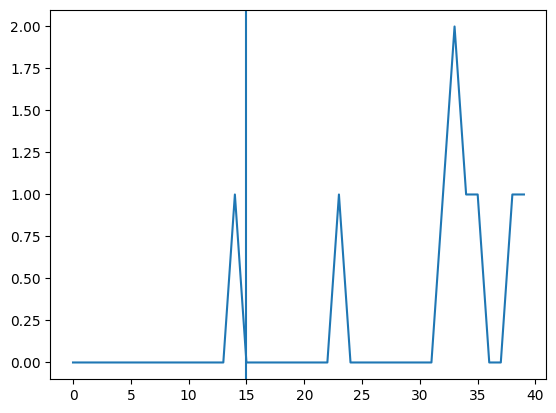

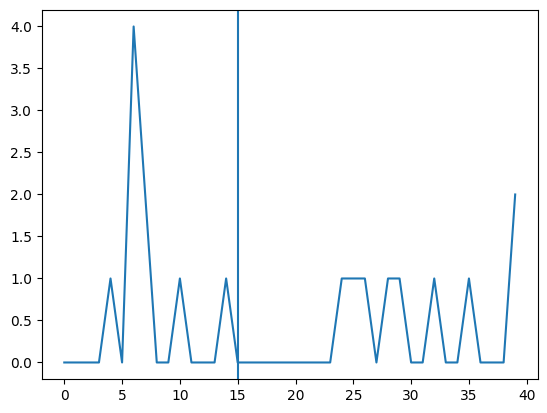

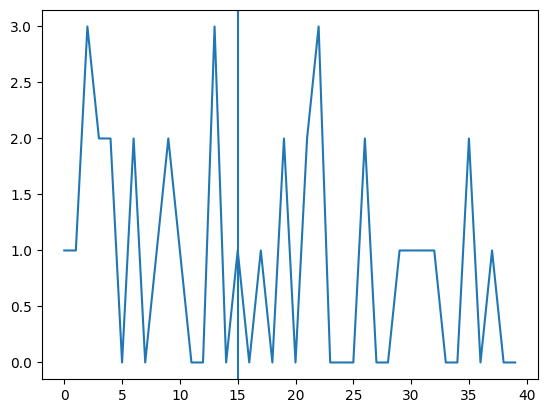

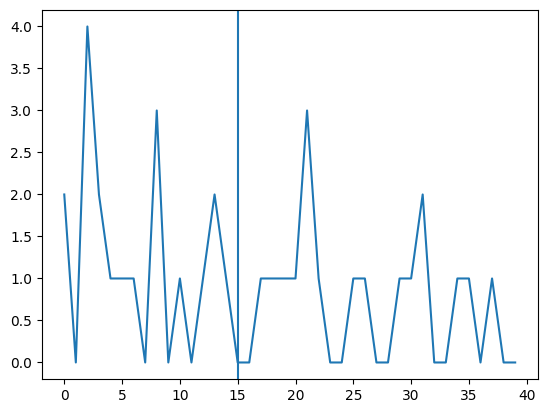

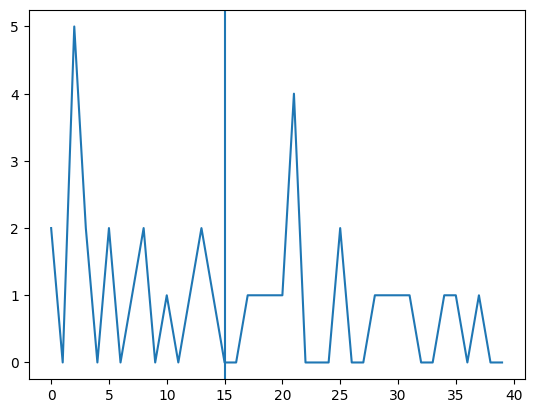

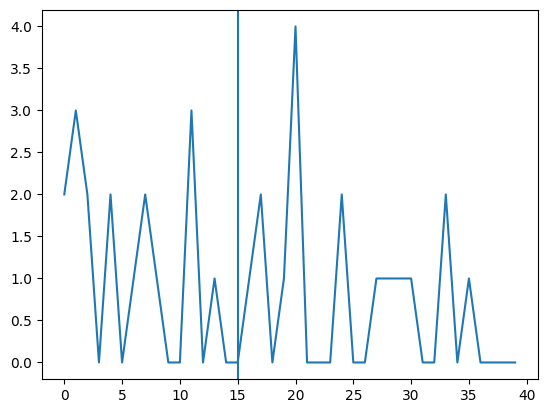

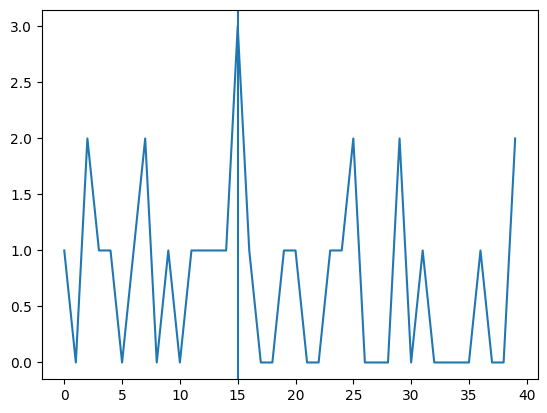

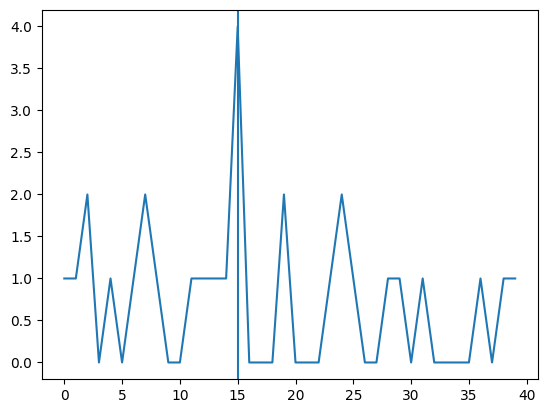

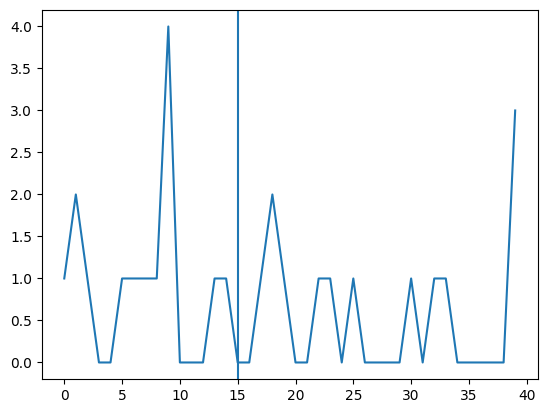

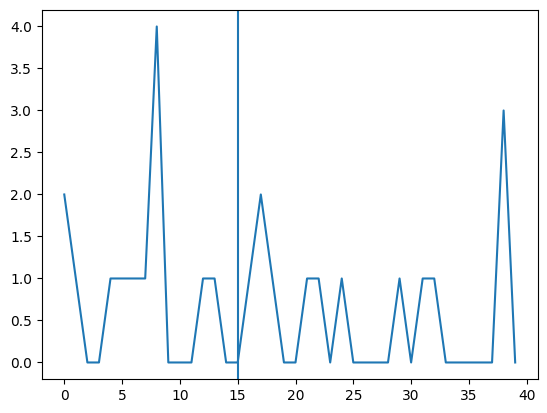

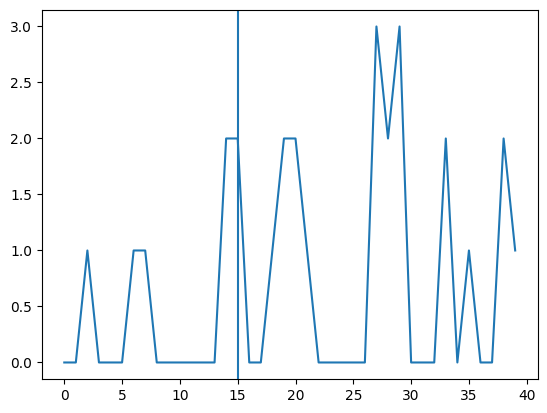

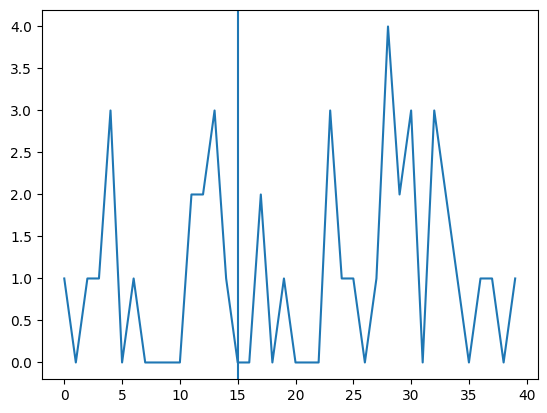

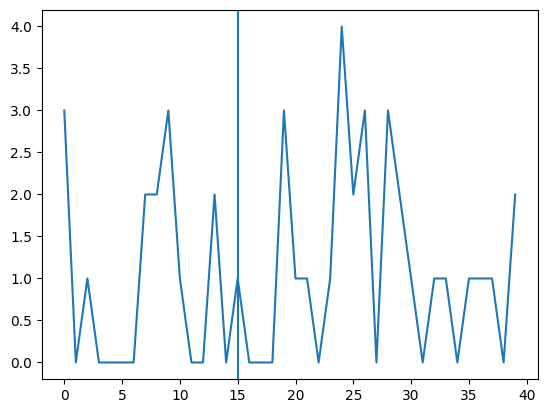

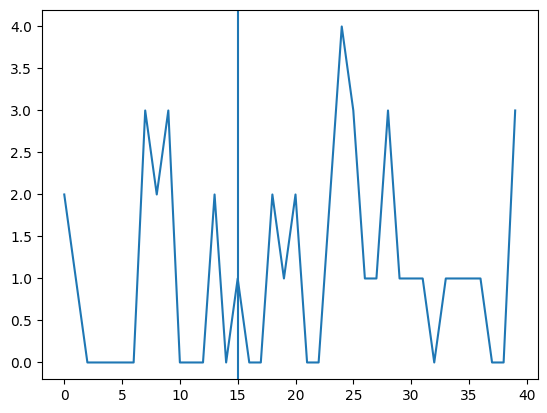

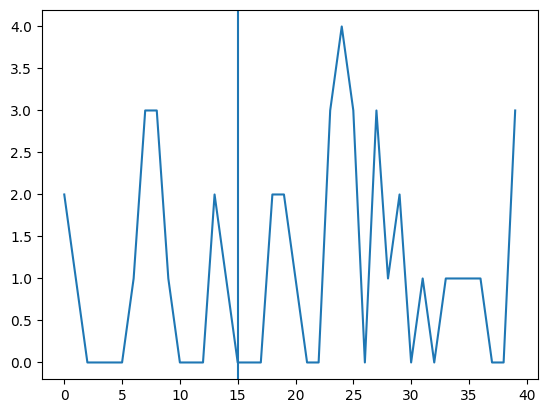

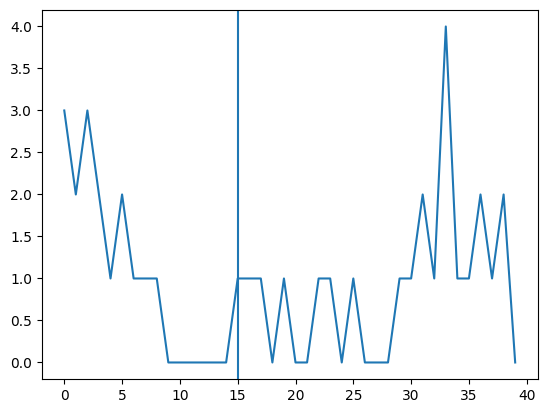

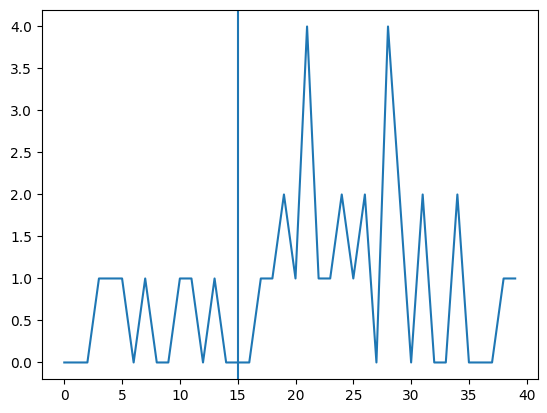

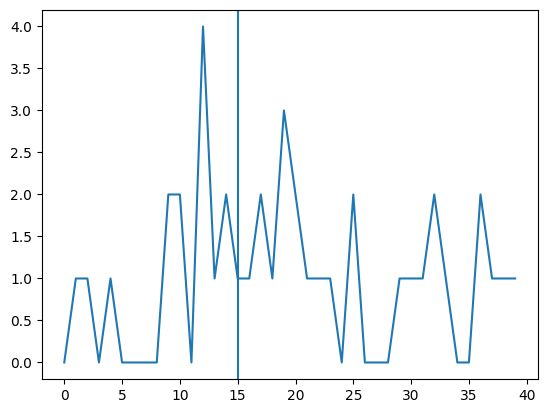

In [82]:
for elt in tracking[15][234:257]:
    plt.plot(elt)
    plt.axvline(t_pre/bin_width)
    plt.show()